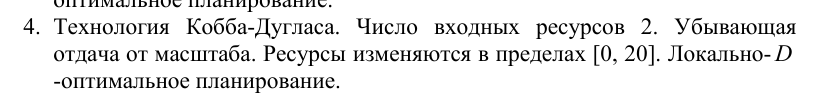

In [80]:
import math
import numpy as np

In [81]:
def kobbaDuglas(tetta, X):
    n = len(X[0])
    y = tetta[0] * np.ones(len(X))
    for i in range(len(X)):
        for j in range(n):
            y[i] *= math.pow(X[i][j], tetta[j + 1])
    return y

# Функция зашумляющие данные на вход принимает вектор y и зашумляет его на noisy
def noisyData(y, noisy):
    n = len(y)
    meanY = np.mean(y)
    difY = y - meanY
    omegaSq = difY.T @ difY / (n - 1)
    p = noisy * omegaSq / 100 # доля шумма
    return np.random.normal(y, math.sqrt(p), n)

Параметры и затравочный эксперимент. Затравочный эксперимент должен содержать 4-5 точек


In [82]:
tetta = np.array([0.5, 2, 1])

# Затравочный эксперимент
X = np.array([[1, 1], [1, 20], [20, 1], [20, 20], [10, 10]])

y = kobbaDuglas(tetta, X)
print(y)
y_tilda = noisyData(y, 20)
print(y_tilda)


[5.e-01 1.e+01 2.e+02 4.e+03 5.e+02]
[-404.96787615  537.67209983  212.45479124 2642.02348235  415.35749174]


In [83]:
def MNK(X, Y):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return np.linalg.inv(X.T @ X) @ X.T @ Y

In [84]:
tetta_tilda = MNK(X, y_tilda)
print(tetta)
print(tetta_tilda)

[0.5 2.  1. ]
[-993.10311925   71.90372271   89.02042316]
